# JIVE demonstration

This notebook deomonstrations some of the JIVE functionality. The notebook assumes the reader has knowledge of JIVE and is looking to understand the basic functionality of this particular python implementaion.

In [1]:
from jive.Jive import Jive

# other optional imports
from jive.jive_visualization import plot_data_blocks,plot_jive_full_estimates

import numpy as np
from __future__ import print_function 

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load toy data

In [2]:
X = np.load('data/toy_ajive_fig2_x.npy')
Y = np.load('data/toy_ajive_fig2_y.npy')

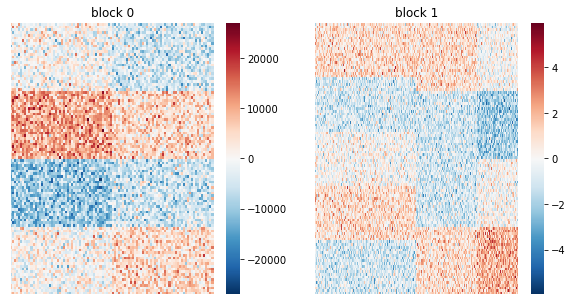

In [3]:
plot_data_blocks([X, Y])

# 1. Compute JIVE decomposition

In [4]:
blocks = [X, Y]

In [ ]:
# initialize JIVE
jive = Jive(blocks)

# compute initial SVD
jive.compute_initial_svd()

# scree plot to select initial signal rank
jive.scree_plots()

### User selects the signal ranks for each data matrix

probably based on the above scree plot, however the user does have the option to use other methods to select the signal ranks

In [ ]:
# set the signal rank using the above scree plots
jive.set_signal_ranks([2, 3])

# estimate the common joint space using Wedin bound then
# estimate block specific joint and individual spaces
jive.estimate_jive_spaces_wedin_bound()

### After selecting signal ranks can now compute the JIVE estimates

In [ ]:
# grab jive estimates
block_specific_estimates = jive.get_block_specific_estimates()

common_joint_space_estimate = jive.get_common_joint_space_estimate()

## jive computes a lot of data

below is some of the data jive computes by default

In [ ]:
# esimated full joint, individual and noise blocks
J_x = block_specific_estimates[0]["joint"]["full"]
I_x = block_specific_estimates[0]["individual"]["full"]
E_x = block_specific_estimates[0]["noise"]

J_y = block_specific_estimates[1]["joint"]["full"]
I_y = block_specific_estimates[1]["individual"]["full"]
E_y = block_specific_estimates[1]["noise"]

In [ ]:
# estimated ranks
indiv_rank_x = block_specific_estimates[0]["individual"]['rank']
indiv_rank_y = block_specific_estimates[1]["individual"]['rank']
joint_rank = block_specific_estimates[0]["joint"]['rank']

In [ ]:
# SVDs of J and I matrix
J_x_u = block_specific_estimates[0]["joint"]["scores"]
J_x_d = block_specific_estimates[0]["joint"]["sing_vals"]
J_x_v = block_specific_estimates[0]["joint"]["loadings"]

I_x_u = block_specific_estimates[0]["individual"]["scores"]
I_x_d = block_specific_estimates[0]["individual"]["sing_vals"]
I_x_v = block_specific_estimates[0]["individual"]["loadings"]

In [ ]:
# SVD of the joint scores
joint_scores_u = common_joint_space_estimate["scores"]
joint_scores_d = common_joint_space_estimate["sing_vals"]
joint_scores_v = common_joint_space_estimate["loadings"]

### visualize JIVE full estimates

In [ ]:
# get full block estimats (I, J, E)
full_block_estimates = jive.get_block_full_estimates()

plot_jive_full_estimates(full_block_estimates, blocks)

# 2. User can manually set the joint space rank

If **wedin_estimate=False** then JIVE will not automatically select the joint signal rank based on the wedin bound. The user then is required to select the joint signal rank themselves with the function **jive.jive.set_joint_rank()**.

In [ ]:
jive = Jive(blocks)
jive.compute_initial_svd()
jive.scree_plots()
jive.set_signal_ranks([2, 3])

In [ ]:
# compute SVD of joint scores matrix
jive.compute_joint_svd()

# user selects the joint space rank
jive.set_joint_rank(2)

In [ ]:
jive.compute_block_specific_spaces()

In [ ]:
common_joint_space_estimate = jive.get_common_joint_space_estimate()

print('joint space rank: %d' % common_joint_space_estimate['scores'].shape[1])